In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
pd.reset_option('display.max_rows')

In [ ]:
df=pd.read_csv('/content/scrap price.csv')

In [ ]:
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Unnamed: 26,Unnamed: 27
0,1.0,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0,NaN,NaN
1,2.0,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0,NaN,NaN
2,3.0,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0,NaN,NaN
3,4.0,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950.0,NaN,NaN
4,5.0,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450.0,NaN,NaN


# The last 2 columns have missing data all over it

In [ ]:
df.shape

(209, 28)

In [ ]:
df.isnull().sum()

,0
ID,4
symboling,4
name,4
fueltypes,4
aspiration,4
doornumbers,4
carbody,4
drivewheels,4
enginelocation,4
wheelbase,4


# I found a pattern that every column has same no of missing values

In [ ]:
df[df['ID'].isnull()]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Unnamed: 26,Unnamed: 27
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 26','Unnamed: 27','compressionratio'],axis=1,inplace=True)

In [ ]:
df.drop(df[df['ID'].isnull()].index,inplace=True)

# Dropped the last two columns and four null rows because we have no use for them. Also removed compressionratio due to numerous outliers affecting the fueltypes column.

In [ ]:
df.drop_duplicates(inplace=True)

# droped duplicate rows

In [ ]:
df.shape

(205, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 208
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              205 non-null    float64
 1   symboling       205 non-null    float64
 2   name            205 non-null    object 
 3   fueltypes       205 non-null    object 
 4   aspiration      205 non-null    object 
 5   doornumbers     205 non-null    object 
 6   carbody         205 non-null    object 
 7   drivewheels     205 non-null    object 
 8   enginelocation  205 non-null    object 
 9   wheelbase       205 non-null    object 
 10  carlength       205 non-null    float64
 11  carwidth        205 non-null    object 
 12  carheight       205 non-null    float64
 13  curbweight      205 non-null    object 
 14  enginetype      205 non-null    object 
 15  cylindernumber  205 non-null    object 
 16  enginesize      205 non-null    object 
 17  fuelsystem      205 non-null    object 


# I noticed that some of the numeric columns have data types that are identified as objects.

In [ ]:
columns_change=['wheelbase','carwidth','curbweight','enginesize','stroke','peakrpm','citympg','highwaympg']

In [ ]:
for column in columns_change:
  df[column] = pd.to_numeric(df[column], errors='coerce')

# changed object type to float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 208
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              205 non-null    float64
 1   symboling       205 non-null    float64
 2   name            205 non-null    object 
 3   fueltypes       205 non-null    object 
 4   aspiration      205 non-null    object 
 5   doornumbers     205 non-null    object 
 6   carbody         205 non-null    object 
 7   drivewheels     205 non-null    object 
 8   enginelocation  205 non-null    object 
 9   wheelbase       201 non-null    float64
 10  carlength       205 non-null    float64
 11  carwidth        204 non-null    float64
 12  carheight       205 non-null    float64
 13  curbweight      204 non-null    float64
 14  enginetype      205 non-null    object 
 15  cylindernumber  205 non-null    object 
 16  enginesize      203 non-null    float64
 17  fuelsystem      205 non-null    object 


In [ ]:
df.dropna(inplace=True)

# Some columns have inconsistent values like '$%^&' so I changed it to null and then dropped it.

In [ ]:
df.isnull().sum()

,0
ID,0
symboling,0
name,0
fueltypes,0
aspiration,0
doornumbers,0
carbody,0
drivewheels,0
enginelocation,0
wheelbase,0


In [ ]:
df['companyname'] = df['name'].apply(lambda x: x.split(' ')[0])

# fetched company name from the name column

In [ ]:
for column in df.select_dtypes('object'):
  print(df[column].unique())

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

# The companyname column contains the same company name spelled in two different ways. so we have to correct both company name and name columns

In [ ]:
corrections = {'maxda': 'mazda', 'porcshce': 'porsche', 'vokswagen': 'volkswagen',
               'vw': 'volkswagen', 'toyouta': 'toyota'}


for wrong, correct in corrections.items():
    df['name'] = df['name'].str.replace(wrong, correct, regex=False)

In [ ]:
corrections = {'maxda': 'mazda', 'porcshce': 'porsche', 'vokswagen': 'volkswagen',
               'vw': 'volkswagen', 'toyouta': 'toyota'}


for wrong, correct in corrections.items():
    df['companyname'] = df['companyname'].str.replace(wrong, correct, regex=False)

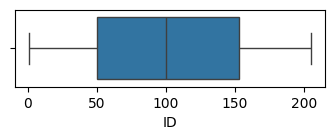

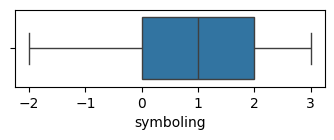

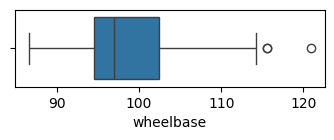

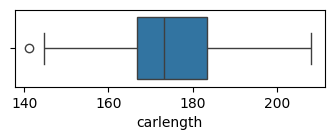

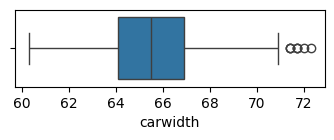

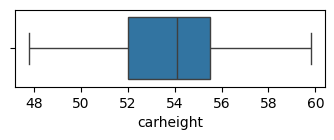

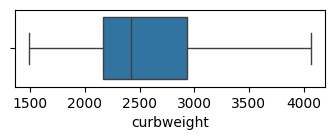

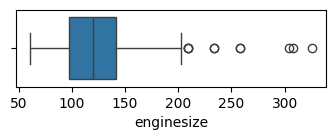

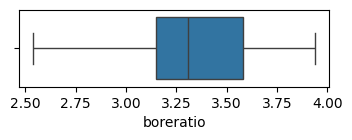

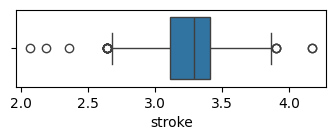

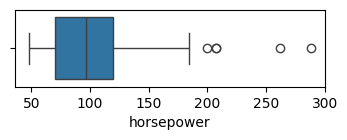

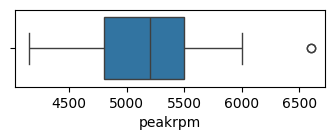

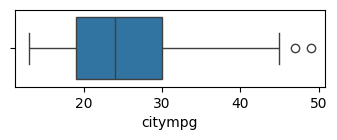

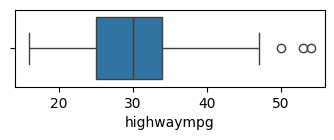

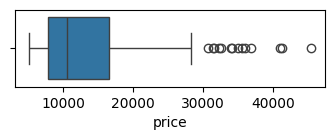

In [ ]:
column=df.select_dtypes(include='number').columns
for col in column:
  plt.figure(figsize=(4,1))
  sns.boxplot(x=df[col])
  plt.show()

# I have identified that some of the columns contain outliers.

In [ ]:
column=['highwaympg','citympg','peakrpm','horsepower','stroke','enginesize','carwidth','wheelbase']

In [ ]:
df.shape

(193, 26)

In [ ]:
for col in column:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
  print(col,lower_bound,upper_bound)

highwaympg 11.5 47.5
citympg 2.875 45.875
peakrpm 3750.0 6550.0
horsepower -2.75 195.25
stroke 2.76 3.8000000000000007
enginesize 31.0 207.0
carwidth 60.25 70.25
wheelbase 84.44999999999999 111.25


In [ ]:
df.shape

(142, 26)

In [ ]:
column=['highwaympg','citympg','peakrpm','horsepower','stroke','enginesize','carwidth','wheelbase']

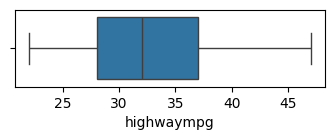

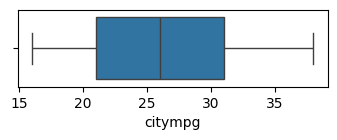

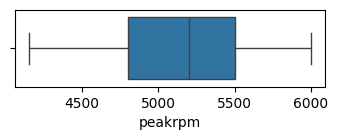

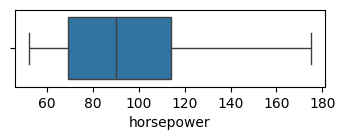

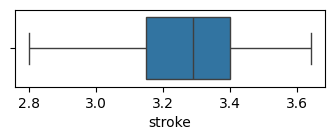

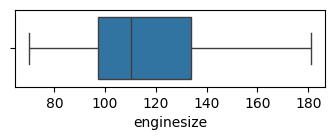

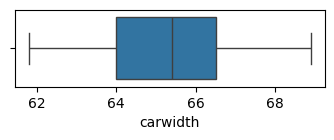

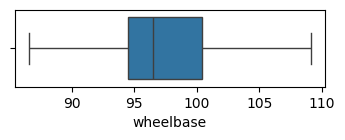

In [ ]:
for col in column:
  plt.figure(figsize=(4,1))
  sns.boxplot(x=df[col])
  plt.show()

# I have removed the outliers, and now it looks better.

In [ ]:
for column in df.select_dtypes('object'):
  print(df[column].value_counts())

name
toyota corolla         6
toyota corona          3
peugeot 504            3
toyota mark ii         3
mazda glc deluxe       3
                      ..
mazda rx3              1
isuzu D-Max V-Cross    1
isuzu MU-X             1
honda civic (auto)     1
volvo 246              1
Name: count, Length: 99, dtype: int64
fueltypes
gas       132
diesel     10
Name: count, dtype: int64
aspiration
std      121
turbo     21
Name: count, dtype: int64
doornumbers
four    83
two     59
Name: count, dtype: int64
carbody
sedan          70
hatchback      53
wagon          14
hardtop         4
convertible     1
Name: count, dtype: int64
drivewheels
fwd    93
rwd    45
4wd     4
Name: count, dtype: int64
enginelocation
front    142
Name: count, dtype: int64
enginetype
ohc      120
ohcv       7
dohc       6
l          5
rotor      4
Name: count, dtype: int64
cylindernumber
four    119
six      15
five      4
two       4
Name: count, dtype: int64
fuelsystem
mpfi    61
2bbl    53
idi     10
1bbl     9
spd

# I found that some categorical columns have very few instances of certain categories. This can impact our analysis.

In [ ]:
df.drop(df[df['companyname'].isin(['chevrolet','mercury','porsche','alfa-romero'])].index,inplace=True)
df.drop(df[df['carbody']=='convertible'].index,inplace=True)
df.drop(df[df['fuelsystem']=='spfi'].index,inplace=True)

In [ ]:
for column in df.select_dtypes('object'):
  print(df[column].value_counts())

name
toyota corolla         6
volkswagen rabbit      3
mazda glc deluxe       3
toyota mark ii         3
toyota corona          3
                      ..
mazda rx3              1
isuzu D-Max V-Cross    1
isuzu D-Max            1
isuzu MU-X             1
volvo 246              1
Name: count, Length: 94, dtype: int64
fueltypes
gas       125
diesel     10
Name: count, dtype: int64
aspiration
std      115
turbo     20
Name: count, dtype: int64
doornumbers
four    82
two     53
Name: count, dtype: int64
carbody
sedan        69
hatchback    48
wagon        14
hardtop       4
Name: count, dtype: int64
drivewheels
fwd    90
rwd    41
4wd     4
Name: count, dtype: int64
enginelocation
front    135
Name: count, dtype: int64
enginetype
ohc      114
ohcv       6
dohc       6
l          5
rotor      4
Name: count, dtype: int64
cylindernumber
four    113
six      14
five      4
two       4
Name: count, dtype: int64
fuelsystem
mpfi    57
2bbl    51
idi     10
1bbl     9
spdi     5
4bbl     3
Name: c

# I dropped some rows of categorical columns that only had one or less count.

In [ ]:
df.sample(5)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price,companyname
5,6.0,2.0,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507.0,ohc,five,136.0,mpfi,3.19,3.40,110.0,5500.0,19.0,25.0,15250.000,audi
87,88.0,1.0,mitsubishi outlander,gas,turbo,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2403.0,ohc,four,110.0,spdi,3.17,3.46,116.0,5500.0,23.0,30.0,9279.000,mitsubishi
37,38.0,0.0,honda accord,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,53.3,2236.0,ohc,four,110.0,1bbl,3.15,3.58,86.0,5800.0,27.0,33.0,7895.000,honda
9,10.0,0.0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053.0,ohc,five,131.0,mpfi,3.13,3.40,160.0,5500.0,16.0,22.0,17859.167,audi
39,40.0,0.0,honda prelude,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2304.0,ohc,four,110.0,1bbl,3.15,3.58,86.0,5800.0,27.0,33.0,8845.000,honda


## "All data has been cleaned."

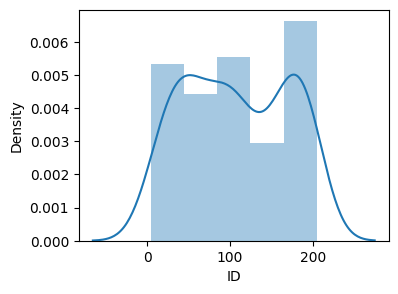

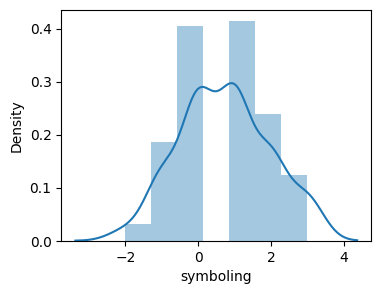

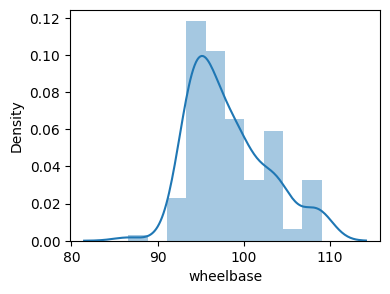

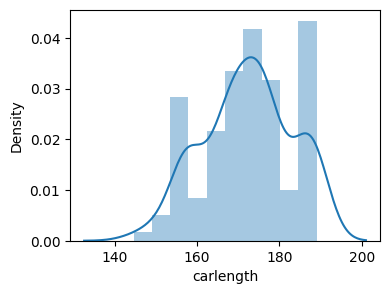

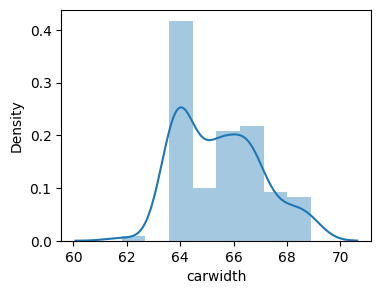

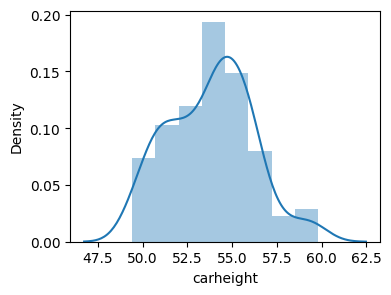

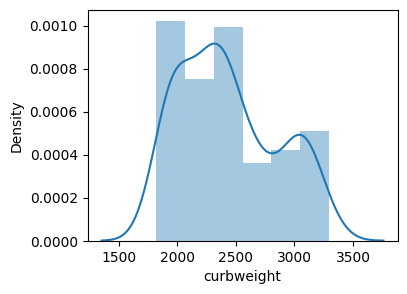

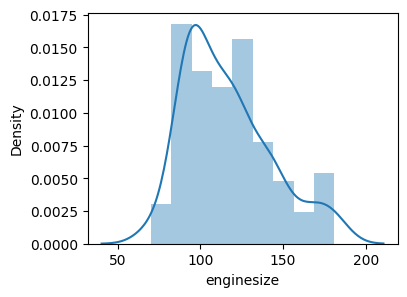

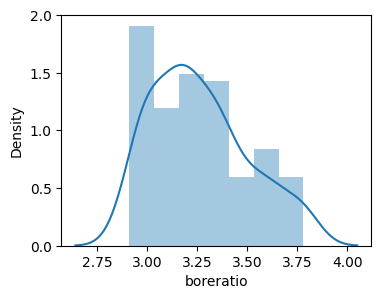

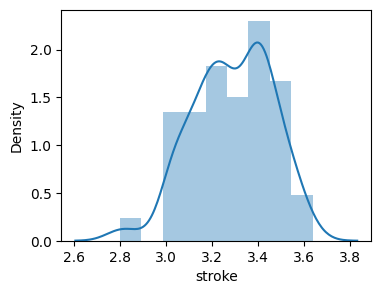

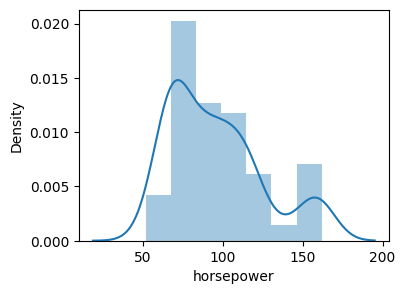

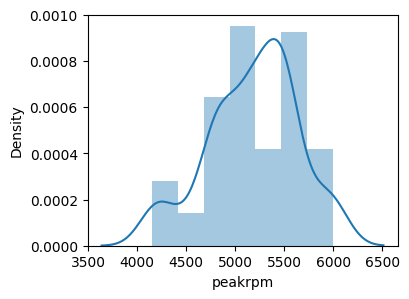

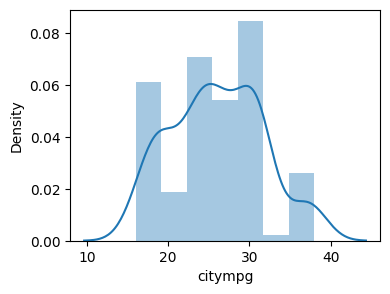

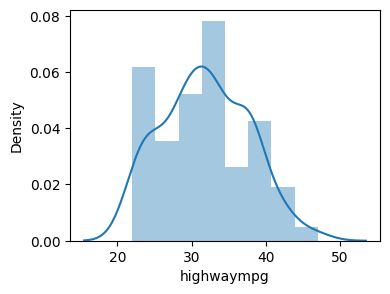

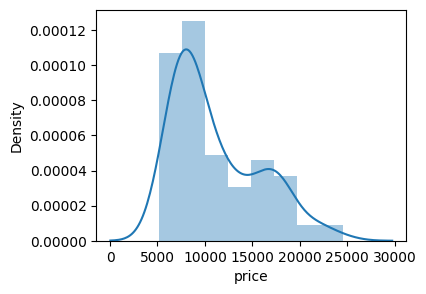

In [ ]:
column=df.select_dtypes(include='number').columns
for col in column:
  plt.figure(figsize=(4,3))
  sns.distplot(df[col])
  plt.show()


# Distribution of Data

1. **Wheelbase**: Most cars have a wheelbase between **94 to 98 inches**.
2. **Car Length**: Majority of car lengths fall between **165 to 180 inches**.
3. **Car Width**: The most common car width is around **64 inches**.
4. **Car Height**: Most cars have a height between **50 to 55 inches**.
5. **Car Weight**: The majority of cars weigh between **1800 to 2500 pounds**.
6. **Engine Size**: Most cars have an engine size between **90 to 110 cubic inches**.
7. **Horsepower**: The most common horsepower is around **70 hp**.
8. **Peak RPM**: Most cars have a peak RPM between **4250 to 5500**.
9. **City MPG**: The typical city mileage is between **21 to 31 miles per gallon**.
10. **Highway MPG**: The highway mileage is mostly in the range of **25 to 40 miles per gallon**.
11. **Price**: Car prices mostly range from **$5000 to $10000**, and the distribution is **right-skewed**.


# Created distplots for every numeric column to understand the different distributions

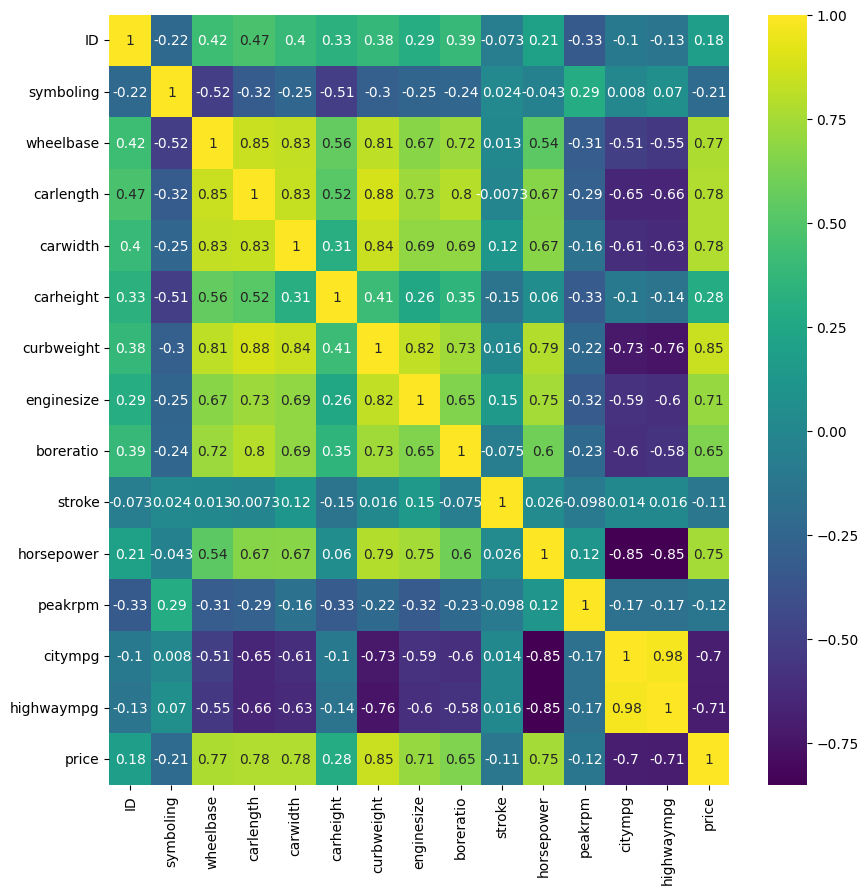

In [ ]:
column=df.select_dtypes(include='number')
plt.figure(figsize=(10,10))
sns.heatmap(column.corr(),cmap='viridis',annot=True)
plt.show()

# top positive relations
* If we increase carlength it significantly positively impacts some columns like wheelbase, carweight and carwidth.
* Increasing carweight significantly positively impacts some columns like carlenght, enginesize, carwidth, wheelbase, and price. It has a direct negative impact on citympg and highwaympg.

# top negative relations
* If we increase citympg it negatively impacts some columns like carweight and horsepower. it has direct strong positive impact on highwaympg.

## Question 1: What factors most strongly affect the price of a car?

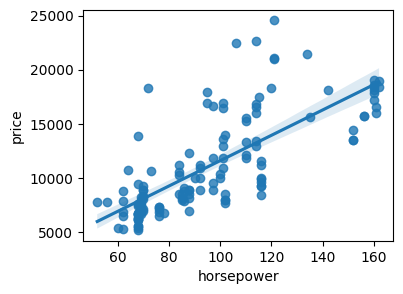

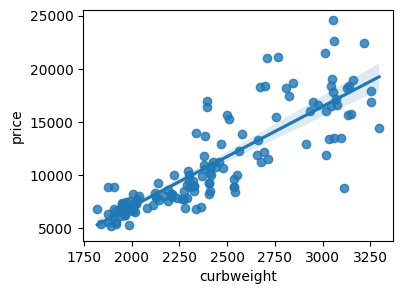

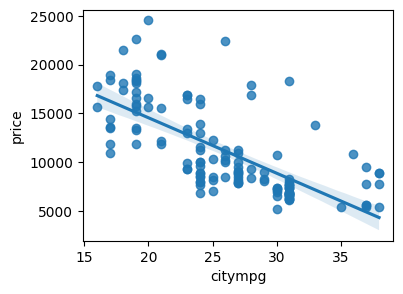

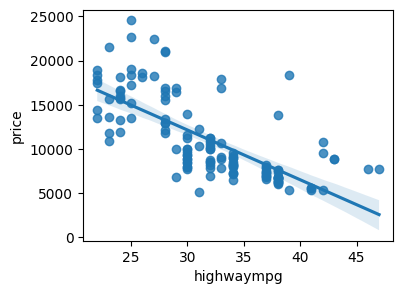

In [ ]:
positive=['horsepower','curbweight','citympg','highwaympg']
for i in positive:
  plt.figure(figsize=(4,3))
  sns.regplot(x=i,y='price',data=df)
  plt.show()

# The price of the car will increase as the weight and horsepower increase, but the mileage will decrease.


## Question 2: Is there a difference in car pricing across different car body types?

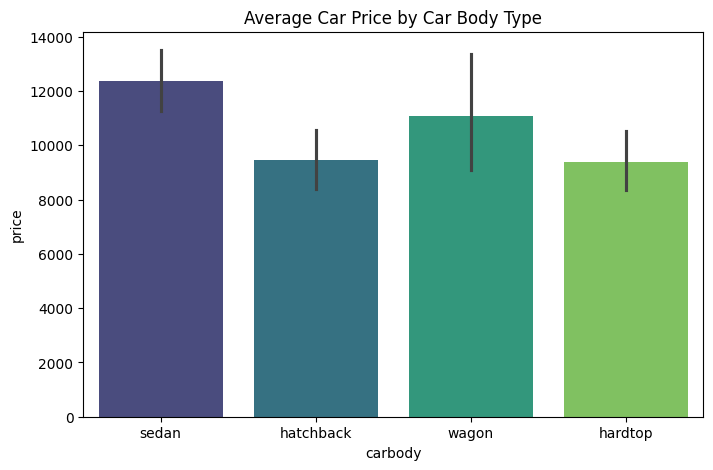

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='carbody', y='price', data=df, estimator=np.mean, palette='viridis')
plt.title('Average Car Price by Car Body Type')
plt.show()

# The sedan model has more expensive variants, while the hardtop & hatchback model offers cheaper options.

## Question 3: Which factors contribute to better fuel efficiency (city and highway)?

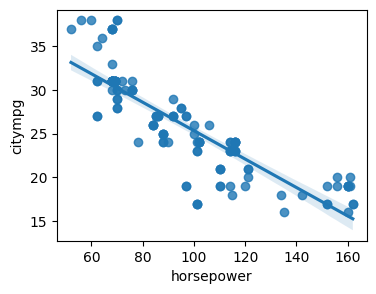

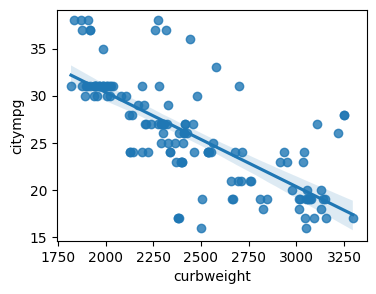

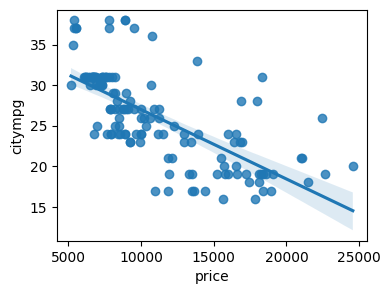

In [ ]:
positive=['horsepower','curbweight','price']
for i in positive:
  plt.figure(figsize=(4,3))
  sns.regplot(x=i,y='citympg',data=df)
  plt.show()

# City and highway mileage will increase as car weight, horsepower, and price decrease.

## Question 4: Compare fuel efficiency for different fuel types (e.g., diesel vs. gas).

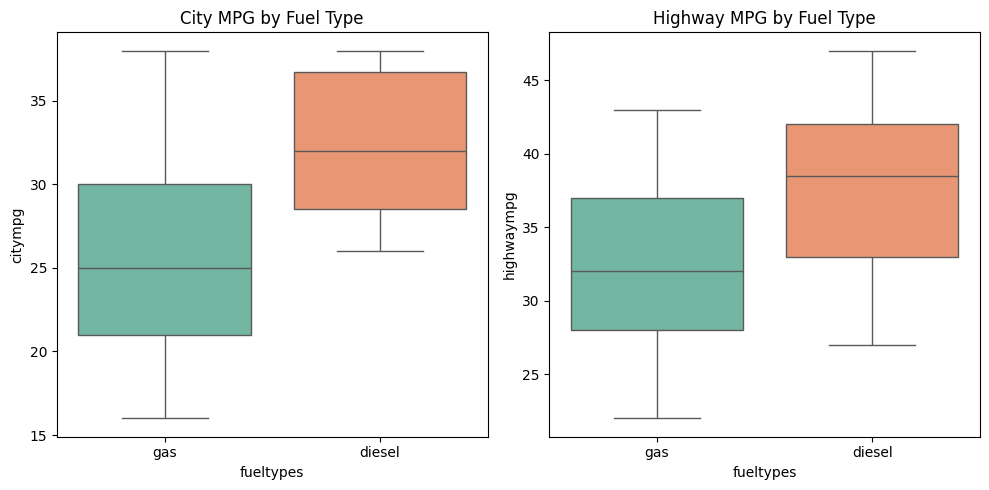

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='fueltypes', y='citympg', data=df, palette='Set2')
plt.title('City MPG by Fuel Type')

plt.subplot(1, 2, 2)
sns.boxplot(x='fueltypes', y='highwaympg', data=df, palette='Set2')
plt.title('Highway MPG by Fuel Type')

plt.tight_layout()
plt.show()

In [ ]:
df.groupby('fueltypes')[['citympg','highwaympg']].agg(['mean','median','min','max'])

citympg                    highwaympg                   
             mean median   min   max       mean median   min   max
fueltypes                                                         
diesel     32.400   32.0  26.0  38.0     38.000   38.5  27.0  47.0
gas        25.528   25.0  16.0  38.0     31.344   32.0  22.0  43.0

In city driving conditions, there is a significant difference in fuel efficiency between gas and diesel cars:
- The minimum fuel efficiency for gas cars is 16 miles per gallon (mpg), while for diesel cars it is 26 mpg.
- The maximum fuel efficiency for both gas and diesel cars is almost the same at 38 mpg.
- The average fuel efficiency for gas cars is 25 mpg, whereas for diesel cars it is 32 mpg.

In highway driving conditions, there is some difference in fuel efficiency between gas and diesel cars:
- The minimum fuel efficiency for gas cars is 22 mpg, whereas for diesel cars it is 27 mpg.
- The maximum fuel efficiency for gas cars is 43 mpg, while for diesel cars it is 47 mpg.
- The average fuel efficiency for gas cars is 31 mpg, and for diesel cars it is 38 mpg.

In conclusion:
- Overall, diesel cars provide the best average fuel efficiency in both city and highway driving conditions.
- Cars generally achieve better mileage on the highway, regardless of whether they are gas or diesel powered.
- There is a gas car that only achieves an average of 16 mpg in the city, while there is a diesel car that achieves an average of 26 mpg in the city.

## Question 5: Does the car's company (brand) influence its pricing?



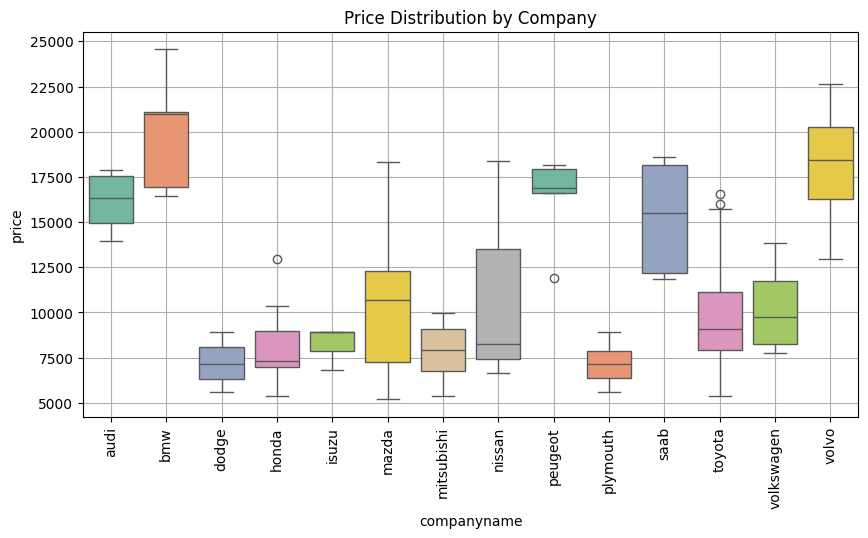

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='companyname', y='price', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Price Distribution by Company')
plt.grid(True)
plt.show()

## Top 5 Expensive Ranges Max Upto
* bmw = 24500
* volvo = 22800
* saab = 18500
* audi = 18000
* peugeot = 18500

## Top Affordable Ranges Min Starts From
* dodge = 5500
* honda = 5300
* isuzu = 7000
* mitsubishi = 5300
* plymouth = 5500

## Companies with Budget and Expensive Ranges
* mazda = 5500-18500
* nissan = 6500-18500
* toyota = 6000-17000

## Question 6: What factors influence a car’s horsepower?

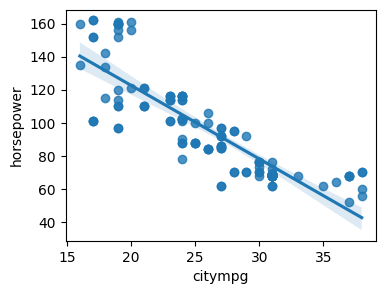

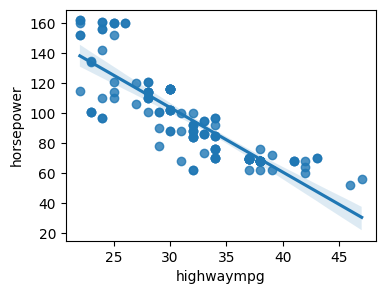

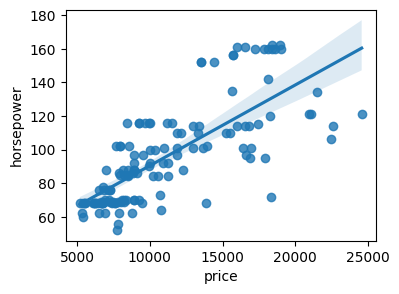

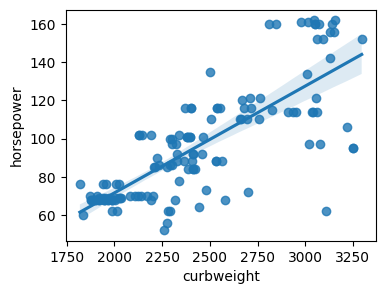

In [ ]:
positive=['citympg','highwaympg','price','curbweight']
for i in positive:
  plt.figure(figsize=(4,3))
  sns.regplot(x=i,y='horsepower',data=df)
  plt.show()

# horsepower will increase than car weight and price will increase and milage city and highway will decrease.

## Question 7: How do drivewheel configurations (FWD, RWD, 4WD) affect pricing and performance?

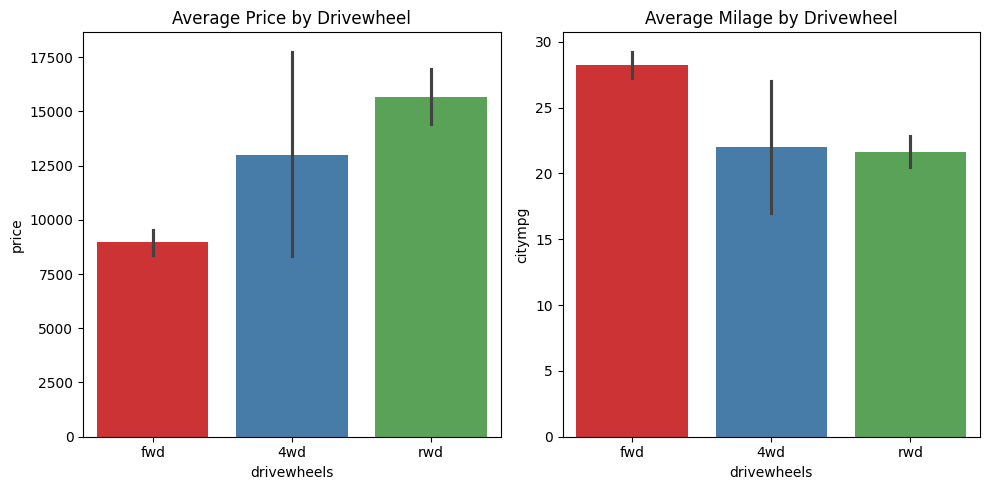

In [ ]:
plt.figure(figsize=(10, 5))

# Price
plt.subplot(1, 2, 1)
sns.barplot(x='drivewheels', y='price', data=df, estimator=np.mean, palette='Set1')
plt.title('Average Price by Drivewheel')

# Horsepower
plt.subplot(1, 2, 2)
sns.barplot(x='drivewheels', y='citympg', data=df, estimator=np.mean, palette='Set1')
plt.title('Average Milage by Drivewheel')

plt.tight_layout()
plt.show()


* fwd has the cheepest cars in drivewheels
* fwd has highest average in city and highway

## Question 8: Which fuel system provides the best fuel efficiency?

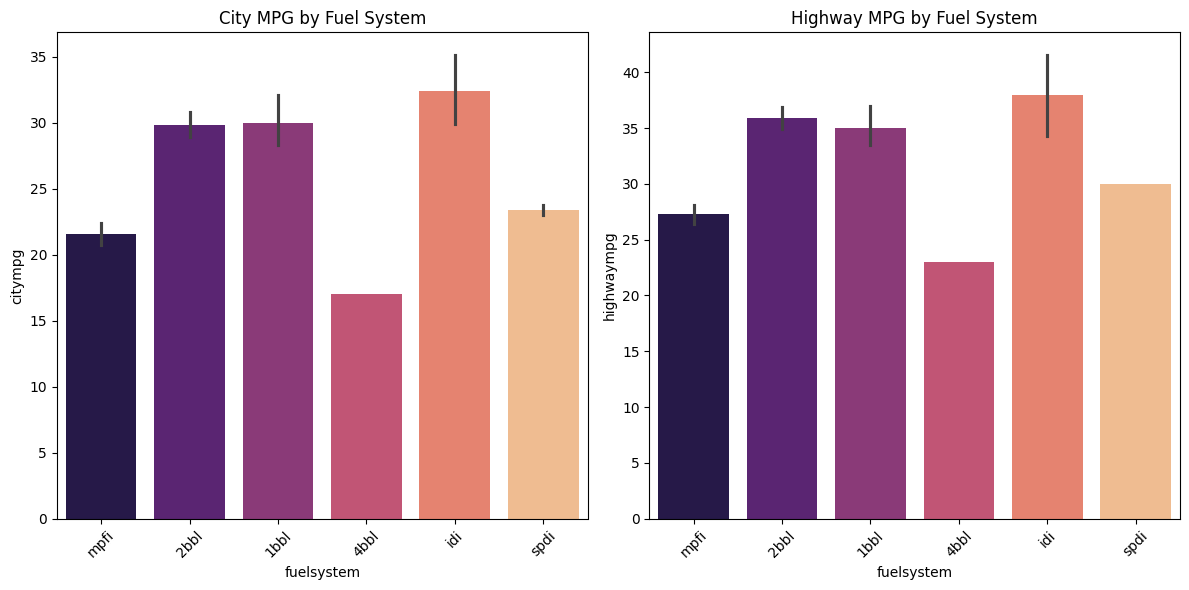

In [ ]:
plt.figure(figsize=(12, 6))

# City MPG
plt.subplot(1, 2, 1)
sns.barplot(x='fuelsystem', y='citympg', data=df, estimator=np.mean, palette='magma')
plt.title('City MPG by Fuel System')
plt.xticks(rotation=45)

# Highway MPG
plt.subplot(1, 2, 2)
sns.barplot(x='fuelsystem', y='highwaympg', data=df, estimator=np.mean, palette='magma')
plt.title('Highway MPG by Fuel System')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


* idi fuel system has the maximum average in both city and highway
* 2bbl and 1bbl has same average in city and bit difference in highway